In [147]:
# K-means Clustering
import os
os.environ["OMP_NUM_THREADS"] = '1'
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
column_names = ["Alcohol", "Malic Acid", "Ash", "Alcalinity of ash",
                   "Magnesium","Total phenols","Flavanoids", "Nonflavanoid phenols",
                   "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]

dataset = pd.read_csv('wine.data', sep=",", names = column_names)
print(dataset.head(5))


# Checking dataset's top few rows and some description of the data
print(dataset.head(2))
print(dataset.info())
print("\n")
print("There are a total of {} types of wine classification in the wine dataset".format(dataset.index.nunique()))
print("\n")
print("Null Values:")
print(dataset.isnull().sum())
print("\n")

   Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
1    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
1    13.16        2.36  2.67               18.6        101           2.80   
1    14.37        1.95  2.50               16.8        113           3.85   
1    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
1        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
1        3.49                  0.24             2.18             7.80  0.86   
1        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
1                  

<AxesSubplot:>

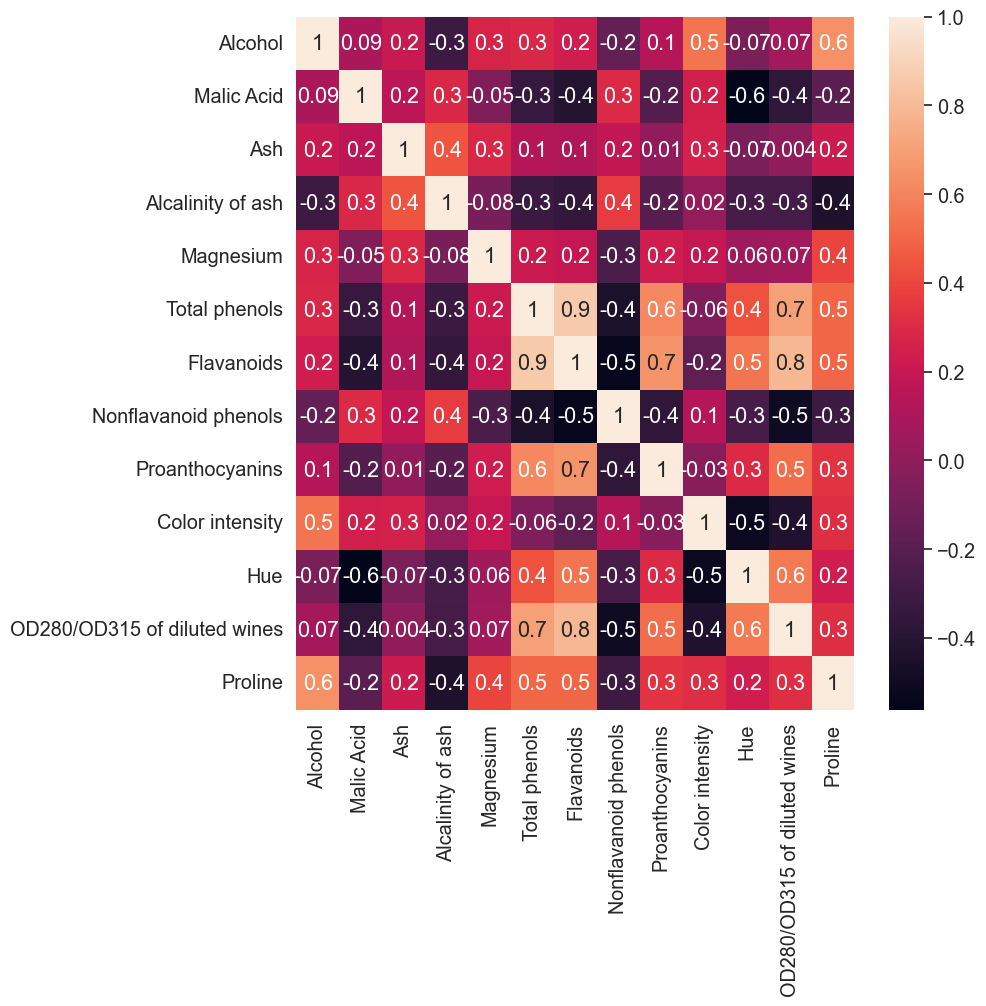

In [156]:
# Plotting heatmap to understand the correlation between the data columns
plt.figure(figsize=(9, 9))
mask = np.tril(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, fmt='.1g')

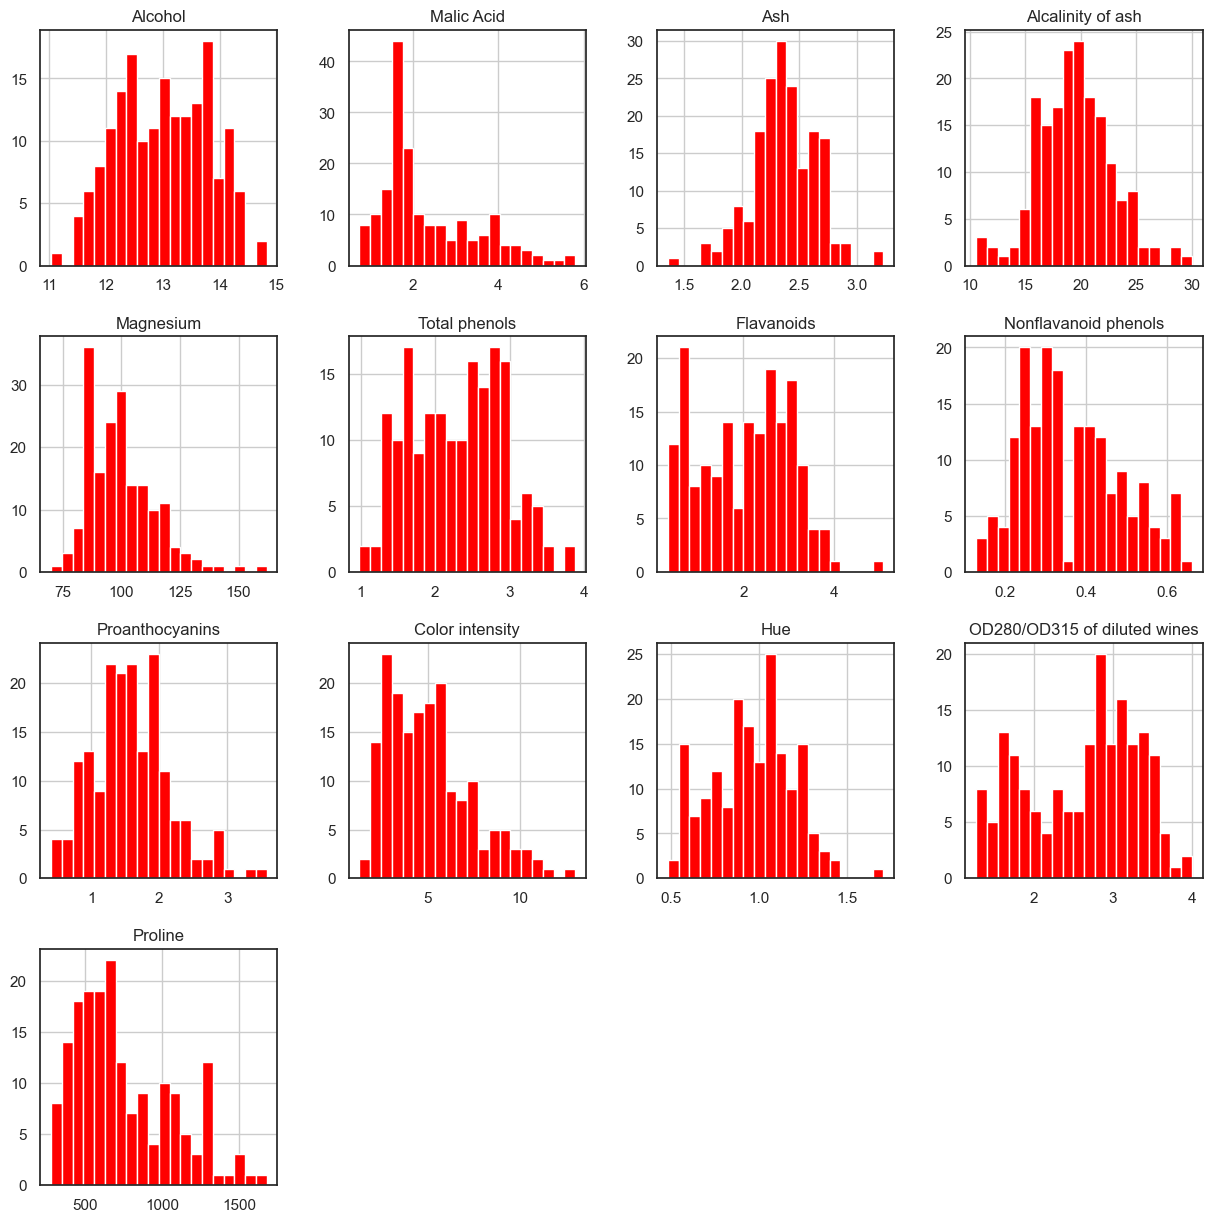

In [157]:
# Histogram plot for some EDA and observation
sns.set(style='white',font_scale=1.0, rc={'figure.figsize':(15,15)})
ax=dataset.hist(bins=20,color='red' )

In [136]:
# Scaling dataset
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

In [143]:
# Clustering silhouette_score to check for best number of clusters (k)
from sklearn.metrics import silhouette_score
sil_score = []
k_value = []

for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    sil_score.append(sil_coeff)
    k_value.append(n_cluster)

For n_clusters=2, The Silhouette Coefficient is 0.25931695553182543
For n_clusters=3, The Silhouette Coefficient is 0.2848589191898987
For n_clusters=4, The Silhouette Coefficient is 0.26214259608648766
For n_clusters=5, The Silhouette Coefficient is 0.22507125763385197
For n_clusters=6, The Silhouette Coefficient is 0.1460411948186198
For n_clusters=7, The Silhouette Coefficient is 0.1527507013081685
For n_clusters=8, The Silhouette Coefficient is 0.14517623752769507
For n_clusters=9, The Silhouette Coefficient is 0.15814593416173847
For n_clusters=10, The Silhouette Coefficient is 0.14702605526175025
For n_clusters=11, The Silhouette Coefficient is 0.14153053089601322


Text(0, 0.5, 'Silhouette Coef')

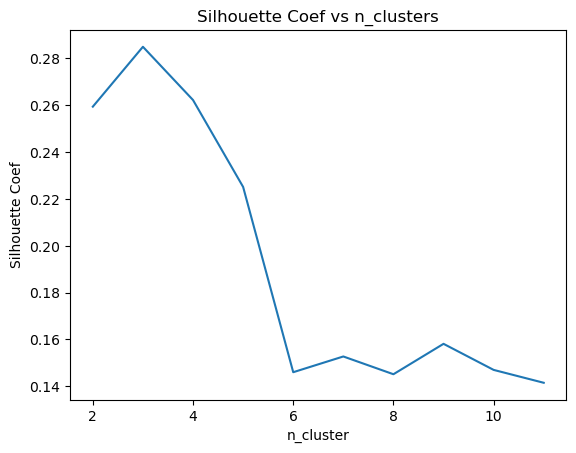

In [144]:
plt.plot(k_value,sil_score)
plt.title("Silhouette Coef vs n_clusters")
plt.xlabel("n_cluster")
plt.ylabel("Silhouette Coef")

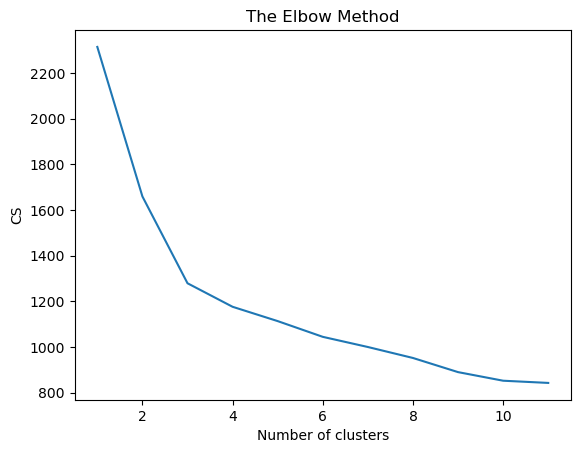

In [146]:
# Using elbow methhod to identify the optimal value for the number of cluster
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

From the Elbow graph above and by using Silhouette Coefficient, we can identify that the optimal value for the number of cluster is 3

KMeans(n_clusters=3)


Text(0, 0.5, 'Color intensity')

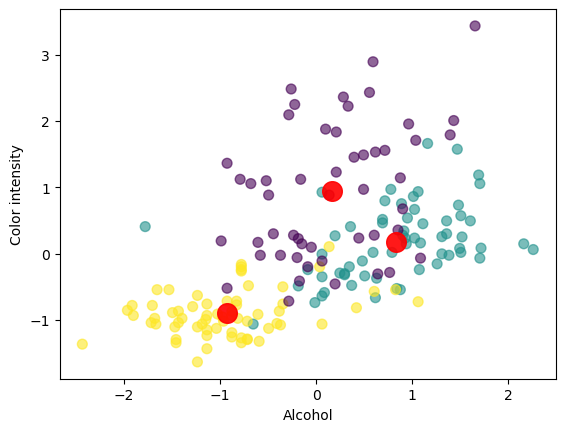

In [113]:
# # fit a Kmeans model to the data using the optimal number of cluster, 3.
model = KMeans(n_clusters=3)
model.fit(dataset)
print(model)

# # Visualize some of the results

import matplotlib.pyplot as plt
X = dataset
y_kmeans = model.predict(X)

# # scatter plot the Color Intensity vs Alcohol level of wines
plt.scatter(X[:, 0], X[:, 9], c=y_kmeans, s=50, cmap='viridis', alpha = 0.6)

# # show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 9], c='red', s=200, alpha=0.9)
plt.xlabel("{}".format(column_names[0]))
plt.ylabel("{}".format(column_names[9]))

Text(0, 0.5, 'Flavanoids')

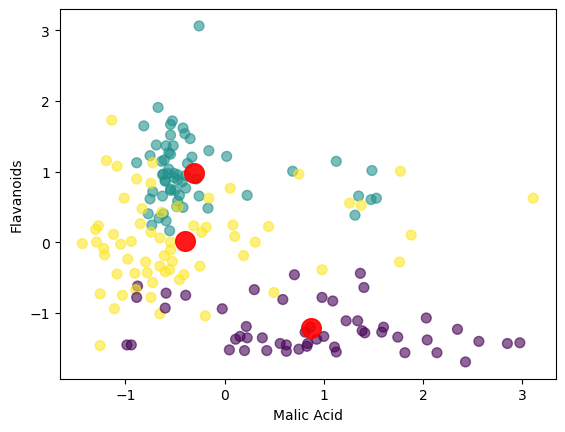

In [114]:
# # scatter plot Flavanoids vs Malic Acid of wine
plt.scatter(X[:, 1], X[:, 6], c=y_kmeans, s=50, cmap='viridis', alpha = 0.6)

# # show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 6], c='red', s=200, alpha=0.9)
plt.xlabel("{}".format(column_names[1]))
plt.ylabel("{}".format(column_names[6]))

From the 2 scatter plots above, we can observe:
1) The centriods are relatively in the centers of the different clusters
2) There are some overlaps of data between the different clusters

KMeans(n_clusters=6)


Text(0, 0.5, 'Color intensity')

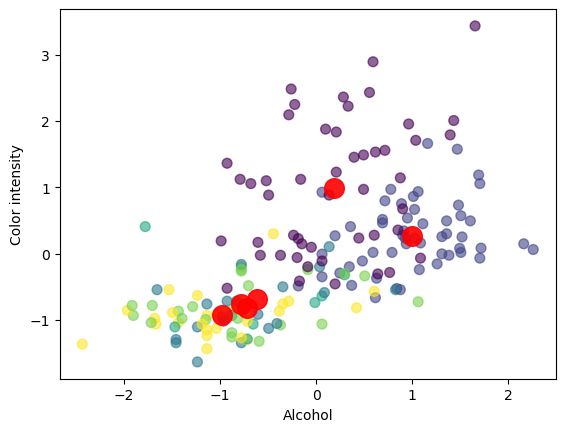

In [115]:
# Testing out k values of higher values e.g 6
# # fit a Kmeans model to the data
model = KMeans(n_clusters=6)
model.fit(dataset)
print(model)
# # Visualize the results

import matplotlib.pyplot as plt
X = dataset
y_kmeans = model.predict(X)

# # scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 0], X[:, 9], c=y_kmeans, s=50, cmap='viridis', alpha = 0.6)

# # show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 9], c='red', s=200, alpha=0.9)
plt.xlabel("{}".format(column_names[0]))
plt.ylabel("{}".format(column_names[9]))

By trying out a different cluster value (which in this case we used 6), 
we observed that the scatter plot between Color Intensity and Alcohol to have more overlaps in cluster data.

The amount of overlap data is much more as compared to the first scatterplot of Color Intensity and Alcohol with a cluster value of 3 instead.